# Exploration and Comparison of Transformers for Image Classification

## Fine-tuning (optimized) using Vision Transformer (ViT)

Fine-tuning is an experiment that involves training the entire model on the new task. All of model's parameters are end-to-end fine-tuned on the provided dataset.

The resulting model's performance is the measured on the test split with accuracy metric.

TODO: talk about the optimalization + data aug

### Vision Transformer (ViT)

Vision Transformer (ViT) model pre-trained on ImageNet-21k (14 million images, 21,843 classes) at resolution 224x224, and fine-tuned on ImageNet 2012 (1 million images, 1,000 classes) at resolution 224x224. It was introduced in the paper *An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale by Dosovitskiy et al.*

https://arxiv.org/abs/2010.11929

### Prerequisites

Load necessary packages.

In [2]:
import os

os.chdir("..")

import pandas as pd
import torch
from datasets import DatasetDict, load_dataset, concatenate_datasets
from src.dataset_builder import ImageDataset
from src.models import *
from src.train import *
from utils.config import *
from utils.data_utils import *
from utils.models_utils import *
from utils.train_utils import *
from utils.visualization_utils import *

Check if there is GPU available.

In [3]:
get_gpu_info()

GPU 0: NVIDIA A100 80GB PCIe MIG 2g.20gb
VRAM: 19.50 GB


Set manual seed for reproducibility.

In [4]:
id = 10
torch.manual_seed(10)

Load ViT image processor used for image pre-processing.

In [5]:
processor = get_backbone_processor(model_names["ViT"])

Print the pre-processing operations done by the processor.

In [6]:
processor

ViTImageProcessorFast {
  "do_convert_rgb": null,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTImageProcessorFast",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

### Data Preprocessing

Load each dataset and its splits.

NOTE: For this experiment, a validation set is required. Since some of the datasets don't have one, it is necessary to create one from a part of the training set.

Processor is automatically applied to each image.

#### RESISC45

In [32]:
resisc45 = load_dataset("timm/resisc45")
clean_labels(resisc45, name="resisc45")
resisc45_train = ImageDataset(
    dataset=resisc45["train"],
    processor=processor,
)
resisc45_validation = ImageDataset(
    dataset=resisc45["validation"],
    processor=processor,
)
resisc45_test = ImageDataset(
    dataset=resisc45["test"],
    processor=processor,
)

In [33]:
resisc45

DatasetDict({
    train: Dataset({
        features: ['image', 'label', 'image_id'],
        num_rows: 18900
    })
    validation: Dataset({
        features: ['image', 'label', 'image_id'],
        num_rows: 6300
    })
    test: Dataset({
        features: ['image', 'label', 'image_id'],
        num_rows: 6300
    })
})

#### Food-101

In [9]:
food101 = load_dataset("ethz/food101")
clean_labels(food101, name="food101")

In [10]:
_food101 = food101["train"].train_test_split(test_size=0.333, seed=id)
food101 = DatasetDict(
    {
        "train": _food101["train"],
        "validation": _food101["test"],
        "test": food101["validation"],
    }
)

In [11]:
food101_train = ImageDataset(
    dataset=food101["train"],
    processor=processor,
)
food101_validation = ImageDataset(
    dataset=food101["validation"],
    processor=processor,
)
food_101_test = ImageDataset(
    dataset=food101["test"],
    processor=processor,
)

In [12]:
food101

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 50525
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 25225
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 25250
    })
})

#### FER2013

In [13]:
fer2013 = load_dataset("AutumnQiu/fer2013")
clean_labels(fer2013, name="fer2013")
fer2013_train = ImageDataset(
    dataset=fer2013["train"],
    processor=processor,
)
fer2013_validation = ImageDataset(
    dataset=fer2013["valid"],
    processor=processor,
)
fer2013_test = ImageDataset(
    dataset=fer2013["test"],
    processor=processor,
)

In [14]:
fer2013

DatasetDict({
    train: Dataset({
        features: ['label', 'image'],
        num_rows: 28709
    })
    valid: Dataset({
        features: ['label', 'image'],
        num_rows: 3589
    })
    test: Dataset({
        features: ['label', 'image'],
        num_rows: 3589
    })
})

#### PCam

In [15]:
pcam = load_dataset("zacharielegault/PatchCamelyon")
clean_labels(pcam, name="pcam")
pcam_train = ImageDataset(
    dataset=pcam["train"],
    processor=processor,
)
pcam_validation = ImageDataset(
    dataset=pcam["validation"],
    processor=processor,
)
pcam_test = ImageDataset(
    dataset=pcam["test"],
    processor=processor,
)

In [16]:
pcam

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 262144
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 32768
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 32768
    })
})

#### SUN397

In [17]:
sun397 = load_dataset("dpdl-benchmark/sun397")
clean_labels(sun397, name="sun397")
sun397_train = ImageDataset(
    dataset=sun397["train"],
    processor=processor,
)
sun397_validation = ImageDataset(
    dataset=sun397["validation"],
    processor=processor,
)
sun397_test = ImageDataset(
    dataset=sun397["test"],
    processor=processor,
)

In [18]:
sun397

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 76127
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 21750
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 10875
    })
})

#### DTD

In [19]:
dtd = load_dataset("tanganke/dtd")
clean_labels(dtd, name="dtd")

In [20]:
_dtd = dtd["train"].train_test_split(test_size=0.1, seed=id)
dtd = DatasetDict(
    {
        "train": _dtd["train"],
        "validation": _dtd["test"],
        "test": dtd["test"],
    }
)

In [21]:
dtd_train = ImageDataset(
    dataset=dtd["train"],
    processor=processor,
)
dtd_validation = ImageDataset(
    dataset=dtd["validation"],
    processor=processor,
)
dtd_test = ImageDataset(
    dataset=dtd["test"],
    processor=processor,
)

In [22]:
dtd

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 3384
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 376
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 1880
    })
})

### Data Augmentation

TODO: text

In [34]:
augmentations = get_data_augmentations()
augmentations

Compose(
    RandomResizedCrop(size=(224, 224), scale=(0.7, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
    RandomHorizontalFlip(p=0.5)
    RandomVerticalFlip(p=0.5)
    RandomInvert(p=0.5)
    RandomRotation(degrees=[-45.0, 45.0], interpolation=nearest, expand=False, fill=0)
    RandomAffine(degrees=[0.0, 0.0], translate=(0.1, 0.1), scale=(0.8, 1.2))
    GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 2.0))
    ColorJitter(brightness=(0.7, 1.3), contrast=(0.7, 1.3), saturation=(0.7, 1.3), hue=(-0.3, 0.3))
)

#### RESISC45

In [35]:
sample = resisc45['train'].train_test_split(train_size=0.15, seed=id)['train']
resisc45_train_sample = ImageDataset(
    dataset=sample,
    processor=processor,
)

In [36]:
resisc45_train_sample.augment_dataset(augmentations=augmentations, batch_size=32)

Map: 100%|██████████| 2835/2835 [01:27<00:00, 32.38 examples/s]

Augmentation completed. Total number of images augmented: 2835


In [37]:
resisc45_train_augmented = concatenate_datasets([resisc45_train.dataset, resisc45_train_sample.dataset])

In [38]:
resisc45_train = ImageDataset(
    dataset=resisc45_train_augmented,
    processor=processor,
)

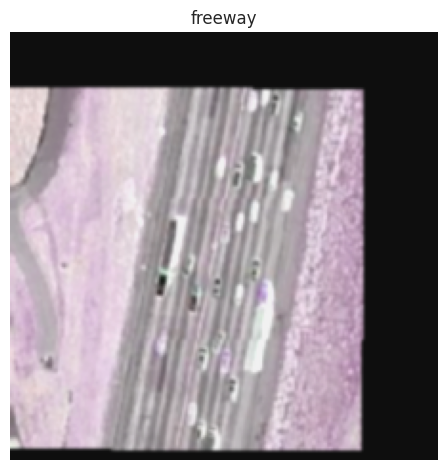

In [39]:
resisc45_train.plot_image(-1)

#### Food-101

In [40]:
sample = food101['train'].train_test_split(train_size=0.15, seed=id)['train']
food101_train_sample = ImageDataset(
    dataset=sample,
    processor=processor,
)

In [41]:
food101_train_sample.augment_dataset(augmentations=augmentations, batch_size=32)

Map: 100%|██████████| 7578/7578 [04:07<00:00, 30.66 examples/s]

Augmentation completed. Total number of images augmented: 7578


In [42]:
food101_train_augmented = concatenate_datasets([food101_train.dataset, food101_train_sample.dataset])

In [43]:
food101_train = ImageDataset(
    dataset=food101_train_augmented,
    processor=processor,
)

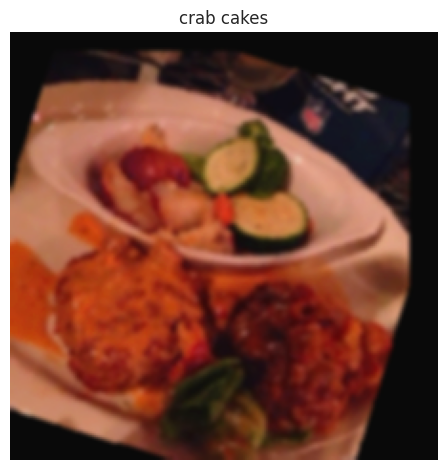

In [44]:
food101_train.plot_image(-1)

#### FER2013

In [45]:
sample = fer2013['train'].train_test_split(train_size=0.15, seed=id)['train']
fer2013_train_sample = ImageDataset(
    dataset=sample,
    processor=processor,
)

In [46]:
fer2013_train_sample.augment_dataset(augmentations=augmentations, batch_size=32)

Map: 100%|██████████| 4306/4306 [01:08<00:00, 62.80 examples/s]

Augmentation completed. Total number of images augmented: 4306


In [47]:
fer2013_train_augmented = concatenate_datasets([fer2013_train.dataset, fer2013_train_sample.dataset])

In [48]:
fer2013_train = ImageDataset(
    dataset=fer2013_train_augmented,
    processor=processor,
)

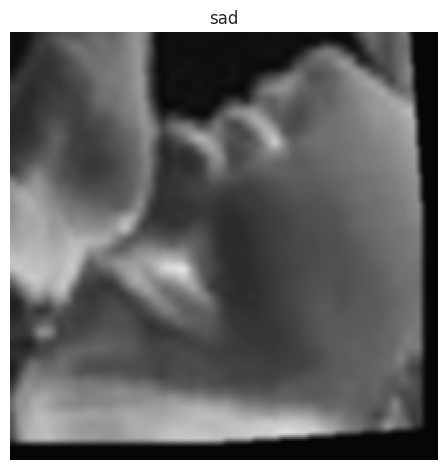

In [49]:
fer2013_train.plot_image(-1)

#### PCam

In [50]:
sample = pcam['train'].train_test_split(train_size=0.15, seed=id)['train']
pcam_train_sample = ImageDataset(
    dataset=sample,
    processor=processor,
)

In [51]:
pcam_train_sample.augment_dataset(augmentations=augmentations, batch_size=32)

Map: 100%|██████████| 39321/39321 [17:59<00:00, 36.42 examples/s]

Augmentation completed. Total number of images augmented: 39321


In [52]:
pcam_train_augmented = concatenate_datasets([pcam_train.dataset, pcam_train_sample.dataset])

In [53]:
pcam_train = ImageDataset(
    dataset=pcam_train_augmented,
    processor=processor,
)

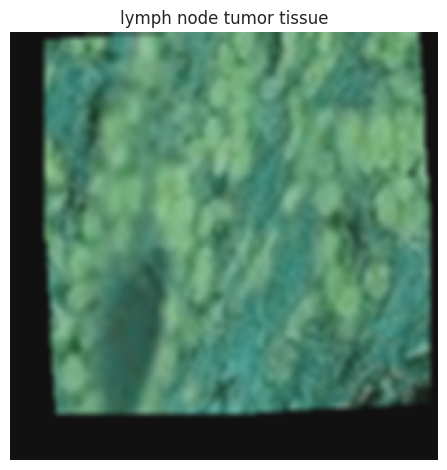

In [54]:
pcam_train.plot_image(-1)

#### SUN397

In [55]:
sample = sun397['train'].train_test_split(train_size=0.15, seed=id)['train']
sun397_train_sample = ImageDataset(
    dataset=sample,
    processor=processor,
)

In [56]:
sun397_train_sample.augment_dataset(augmentations=augmentations, batch_size=32)

Map: 100%|██████████| 11419/11419 [06:05<00:00, 31.26 examples/s]

Augmentation completed. Total number of images augmented: 11419


In [57]:
sun397_train_augmented = concatenate_datasets([sun397_train.dataset, sun397_train_sample.dataset])

In [58]:
sun397_train = ImageDataset(
    dataset=sun397_train_augmented,
    processor=processor,
)

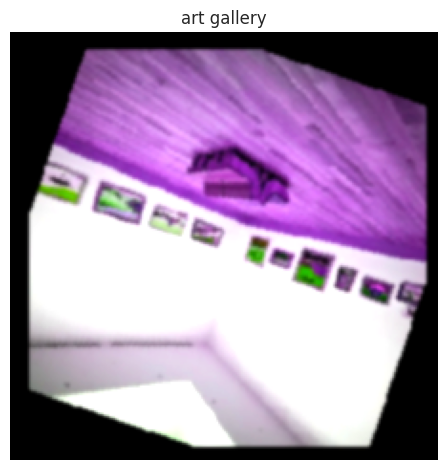

In [59]:
sun397_train.plot_image(-1)

#### DTD

In [60]:
sample = dtd['train'].train_test_split(train_size=0.15, seed=id)['train']
dtd_train_sample = ImageDataset(
    dataset=sample,
    processor=processor,
)

In [61]:
dtd_train_sample.augment_dataset(augmentations=augmentations, batch_size=32)

Map: 100%|██████████| 507/507 [00:15<00:00, 32.87 examples/s]

Augmentation completed. Total number of images augmented: 507


In [62]:
dtd_train_augmented = concatenate_datasets([dtd_train.dataset, dtd_train_sample.dataset])

In [63]:
dtd_train = ImageDataset(
    dataset=dtd_train_augmented,
    processor=processor,
)

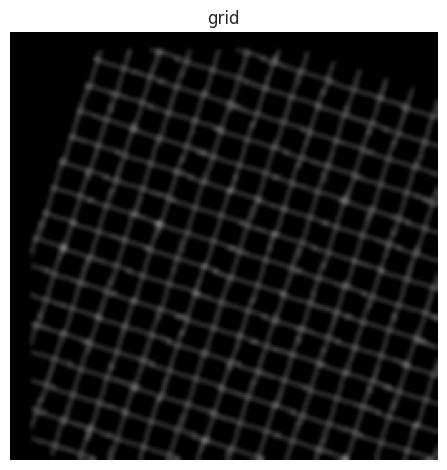

In [64]:
dtd_train.plot_image(-1)

### Config

Create a config for experiments and print its settings.

In [65]:
scheduler = SchedulerConfig(
    enabled=True,
    warmup_epochs=3,
    eta_min=1e-7,
    linear_start_factor=0.1,
    linear_end_factor=1.0
)
scheduler.get_scheduler_settings()

{'enabled': True,
 'warmup_epochs': 3,
 'eta_min': 1e-07,
 'linear_start_factor': 0.1,
 'linear_end_factor': 1.0}

In [66]:
gradient_clipping = GradientClippingConfig(
    enabled=True,
    max_norm=2.0
)
gradient_clipping.get_clipping_settings()

{'enabled': True, 'max_norm': 2.0}

In [67]:
early_stopping = EarlyStoppingConfig(
    enabled=True,
    patience=3,
    delta=0.01,
)
early_stopping.get_early_stopping_settings()

{'enabled': True, 'patience': 3, 'delta': 0.01}

In [69]:
from torch.optim import AdamW

config = Config(
    batch_size=32, 
    num_epochs=10, 
    lr=3e-5, 
    optimizer=AdamW, 
    weight_decay=1e-2,
    early_stopping=early_stopping,
    gradient_clipping=gradient_clipping,
    scheduler=scheduler,
)
config.get_settings()

{'device': 'cuda',
 'criterion': CrossEntropyLoss(),
 'batch_size': 32,
 'lr': 3e-05,
 'num_epochs': 10,
 'optimizer': torch.optim.adamw.AdamW,
 'weight_decay': 0.01,
 'early_stopping': {'enabled': True, 'patience': 3, 'delta': 0.01},
 'gradient_clipping': {'enabled': True, 'max_norm': 2.0},
 'scheduler': {'enabled': True,
  'warmup_epochs': 3,
  'eta_min': 1e-07,
  'linear_start_factor': 0.1,
  'linear_end_factor': 1.0}}

Plot the learning rate curve from scheduling settings.

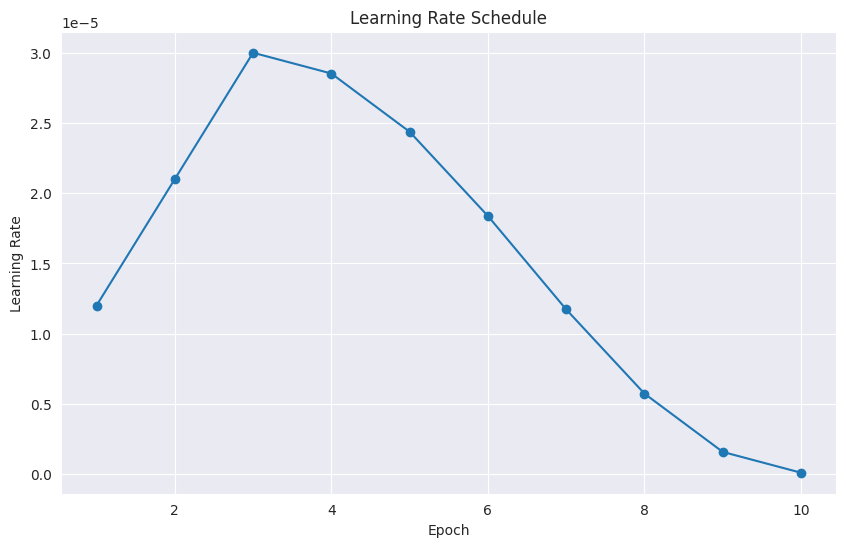

In [70]:
plot_learning_rate_scheduling(
    num_epochs=config.num_epochs,
    num_warmup_epochs=config.scheduler.warmup_epochs,
    linear_start_factor=config.scheduler.linear_start_factor,
    linear_end_factor=config.scheduler.linear_end_factor,
    base_lr=config.lr,
    eta_min=config.scheduler.eta_min,
)

Create empty array to store dataset accuracies for each experiment.

In [71]:
resisc45_accs = []
food101_accs = []
fer2013_accs = []
pcam_accs = []
sun397_accs = []
dtd_accs = []

### Fine-tuning with data augmentation


Train the entire model and all of its parameters on a new dataset.

#### RESISC45

In [72]:
vit_resisc45 = Backbone(
    model_names["ViT"],
    num_classes=len(resisc45_train.get_labels()),
    dropout=True,
    dropout_rate=0.2
)

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([45]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([45, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [73]:
get_model_params(vit_resisc45)

Parameters: 85.83M


In [74]:
resisc45_loss, resisc45_acc, resisc45_per_class_acc, _, _, _ = train_model(
    vit_resisc45,
    resisc45_train,
    config,
    "vit",
    val=resisc45_validation,
    use_val=True,
    fine_tune=True,
    use_early_stopping=config.early_stopping.enabled,
    gradient_clipping=config.gradient_clipping.enabled,
    scheduling=config.scheduler.enabled,
)

100%|██████████| 197/197 [00:20<00:00,  9.60it/s]


Epochs: 1/10 | train_loss: 3.2136 | train_acc: 0.2394 | val_loss: 2.3152 | val_acc: 0.6170


100%|██████████| 197/197 [00:19<00:00, 10.32it/s]


Epochs: 2/10 | train_loss: 1.0164 | train_acc: 0.8028 | val_loss: 0.3615 | val_acc: 0.9195


100%|██████████| 680/680 [02:51<00:00,  3.97it/s]
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:240: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)
100%|██████████| 197/197 [00:19<00:00, 10.07it/s]


Epochs: 3/10 | train_loss: 0.2721 | train_acc: 0.9313 | val_loss: 0.1947 | val_acc: 0.9433


100%|██████████| 197/197 [00:19<00:00, 10.36it/s]


Epochs: 4/10 | train_loss: 0.0994 | train_acc: 0.9745 | val_loss: 0.1840 | val_acc: 0.9427


100%|██████████| 197/197 [00:19<00:00, 10.29it/s]


Epochs: 5/10 | train_loss: 0.0313 | train_acc: 0.9923 | val_loss: 0.1837 | val_acc: 0.9473


100%|██████████| 197/197 [00:18<00:00, 10.46it/s]


Epochs: 6/10 | train_loss: 0.0113 | train_acc: 0.9977 | val_loss: 0.1848 | val_acc: 0.9514


100%|██████████| 197/197 [00:19<00:00,  9.92it/s]


Epochs: 7/10 | train_loss: 0.0028 | train_acc: 0.9997 | val_loss: 0.1738 | val_acc: 0.9557


100%|██████████| 197/197 [00:19<00:00, 10.23it/s]


Epochs: 8/10 | train_loss: 0.0013 | train_acc: 1.0000 | val_loss: 0.1638 | val_acc: 0.9595


100%|██████████| 197/197 [00:19<00:00, 10.09it/s]


Epochs: 9/10 | train_loss: 0.0010 | train_acc: 1.0000 | val_loss: 0.1656 | val_acc: 0.9598


100%|██████████| 197/197 [00:19<00:00, 10.07it/s]

Epochs: 10/10 | train_loss: 0.0009 | train_acc: 1.0000 | val_loss: 0.1658 | val_acc: 0.9597


In [75]:
resisc45_loss, resisc45_acc, resisc45_per_class_acc = evaluate_model(
    vit_resisc45, resisc45_test, config
)

100%|██████████| 197/197 [00:19<00:00,  9.90it/s]

test_loss: 0.1770 | test_acc: 0.9554


In [76]:
resisc45_accs.append(resisc45_acc)

In [77]:
get_top_5_accuracies(resisc45_per_class_acc)

[('airplane', 1.0),
 ('chaparral', 1.0),
 ('baseball diamond', 0.991869918699187),
 ('golf course', 0.9918032786885246),
 ('mountain', 0.991304347826087)]

In [78]:
get_bottom_5_accuracies(resisc45_per_class_acc)

[('palace', 0.7428571428571429),
 ('church', 0.8811188811188811),
 ('medium residential', 0.8979591836734694),
 ('river', 0.9019607843137255),
 ('railway station', 0.9155844155844156)]

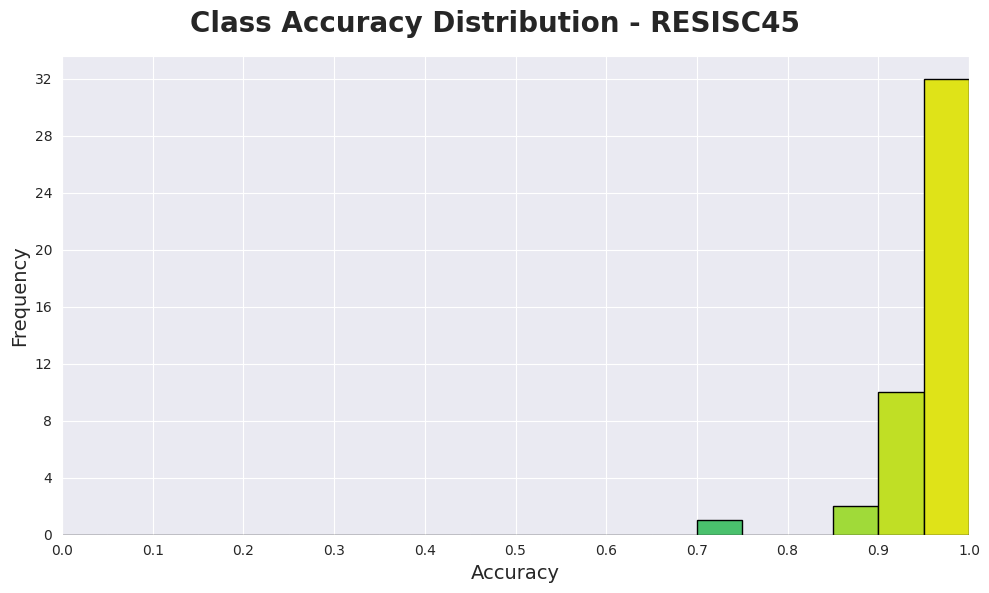

In [79]:
plot_per_class_accuracies(resisc45_per_class_acc, "RESISC45", num_bins=20)

#### Food-101

In [82]:
vit_food101 = Backbone(
    model_names["ViT"], 
    num_classes=len(food101_train.get_labels()),
    dropout=True,
    dropout_rate=0.2
)

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([101]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([101, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [83]:
get_model_params(vit_food101)

Parameters: 85.88M


In [84]:
food101_loss, food101_acc, food101_per_class_acc, _, _, _ = train_model(
    vit_food101,
    food101_train,
    config,
    "vit",
    val=food101_validation,
    use_val=True,
    fine_tune=True,
    use_early_stopping=config.early_stopping.enabled,
    gradient_clipping=config.gradient_clipping.enabled,
    scheduling=config.scheduler.enabled,
)

 75%|███████▌  | 1362/1816 [06:44<02:13,  3.40it/s]/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))
100%|██████████| 789/789 [01:51<00:00,  7.05it/s]


Epochs: 1/10 | train_loss: 3.9409 | train_acc: 0.2116 | val_loss: 2.9321 | val_acc: 0.5500


100%|██████████| 789/789 [01:48<00:00,  7.29it/s]


Epochs: 2/10 | train_loss: 1.7123 | train_acc: 0.6731 | val_loss: 0.9427 | val_acc: 0.7910


100%|██████████| 1816/1816 [08:43<00:00,  3.47it/s]
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:240: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)
100%|██████████| 789/789 [01:47<00:00,  7.35it/s]


Epochs: 3/10 | train_loss: 0.8277 | train_acc: 0.8035 | val_loss: 0.6914 | val_acc: 0.8227


100%|██████████| 789/789 [01:47<00:00,  7.32it/s]


Epochs: 4/10 | train_loss: 0.4622 | train_acc: 0.8851 | val_loss: 0.6757 | val_acc: 0.8231


100%|██████████| 789/789 [01:51<00:00,  7.06it/s]


Epochs: 5/10 | train_loss: 0.2182 | train_acc: 0.9477 | val_loss: 0.7065 | val_acc: 0.8249


100%|██████████| 789/789 [01:50<00:00,  7.14it/s]


Epochs: 6/10 | train_loss: 0.0889 | train_acc: 0.9808 | val_loss: 0.7334 | val_acc: 0.8293


100%|██████████| 789/789 [01:47<00:00,  7.33it/s]


Early stopping triggered. Stopping training and saving the model...


In [85]:
food101_loss, food101_acc, food101_per_class_acc = evaluate_model(
    vit_food101, food101_validation, config
)

100%|██████████| 789/789 [01:49<00:00,  7.23it/s]


test_loss: 0.7783 | test_acc: 0.8268


In [86]:
food101_accs.append(food101_acc)

In [87]:
get_top_5_accuracies(food101_per_class_acc)

[('edamame', 0.9670781893004116),
 ('mussels', 0.9459459459459459),
 ('macarons', 0.9458333333333333),
 ('pad thai', 0.9421487603305785),
 ('miso soup', 0.9382716049382716)]

In [88]:
get_bottom_5_accuracies(food101_per_class_acc)

[('pork chop', 0.569620253164557),
 ('steak', 0.5862068965517241),
 ('tuna tartare', 0.5862068965517241),
 ('ravioli', 0.6160337552742616),
 ('chocolate mousse', 0.6555555555555556)]

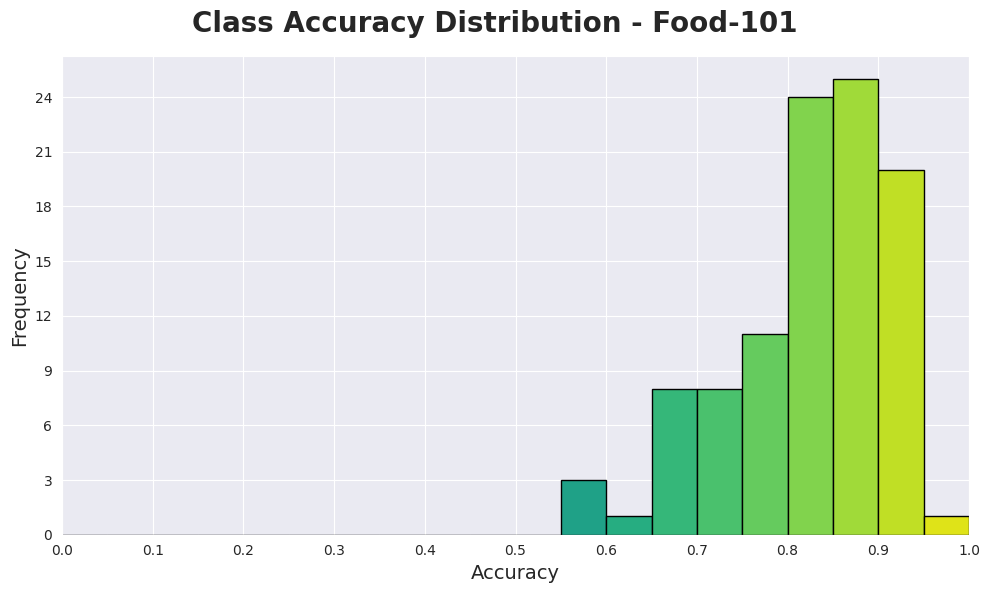

In [89]:
plot_per_class_accuracies(food101_per_class_acc, "Food-101", num_bins=20)

#### FER2013

In [90]:
vit_fer2013 = Backbone(
    model_names["ViT"], 
    num_classes=len(fer2013_train.get_labels()),
    dropout=True,
    dropout_rate=0.2
)

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([7]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([7, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [91]:
get_model_params(vit_fer2013)

Parameters: 85.80M


In [92]:
fer2013_loss, fer2013_acc, fer2013_per_class_acc, _, _, _ = train_model(
    vit_fer2013,
    fer2013_train,
    config,
    "vit",
    val=fer2013_validation,
    use_val=True,
    fine_tune=True,
    use_early_stopping=config.early_stopping.enabled,
    gradient_clipping=config.gradient_clipping.enabled,
    scheduling=config.scheduler.enabled,
)

100%|██████████| 113/113 [00:09<00:00, 11.72it/s]


Epochs: 1/10 | train_loss: 1.4129 | train_acc: 0.4619 | val_loss: 1.1224 | val_acc: 0.5821


100%|██████████| 113/113 [00:09<00:00, 11.45it/s]


Epochs: 2/10 | train_loss: 1.0558 | train_acc: 0.6054 | val_loss: 0.9483 | val_acc: 0.6467


100%|██████████| 1032/1032 [04:07<00:00,  4.17it/s]
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:240: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)
100%|██████████| 113/113 [00:09<00:00, 11.56it/s]


Epochs: 3/10 | train_loss: 0.8726 | train_acc: 0.6772 | val_loss: 0.9004 | val_acc: 0.6581


100%|██████████| 113/113 [00:09<00:00, 11.70it/s]


Epochs: 4/10 | train_loss: 0.7032 | train_acc: 0.7475 | val_loss: 0.9179 | val_acc: 0.6718


100%|██████████| 113/113 [00:09<00:00, 11.80it/s]


Epochs: 5/10 | train_loss: 0.4522 | train_acc: 0.8453 | val_loss: 0.9765 | val_acc: 0.6893


100%|██████████| 113/113 [00:09<00:00, 11.75it/s]

Early stopping triggered. Stopping training and saving the model...


In [93]:
fer2013_loss, fer2013_acc, fer2013_per_class_acc = evaluate_model(
    vit_fer2013, fer2013_test, config
)

100%|██████████| 113/113 [00:09<00:00, 12.03it/s]

test_loss: 1.0467 | test_acc: 0.7083


In [94]:
fer2013_accs.append(fer2013_acc)

In [95]:
fer2013_per_class_acc

{'angry': 0.7372708757637475,
 'disgust': 0.6181818181818182,
 'fear': 0.5151515151515151,
 'happy': 0.89419795221843,
 'sad': 0.5151515151515151,
 'surprise': 0.8293269230769231,
 'neutral': 0.6980830670926518}

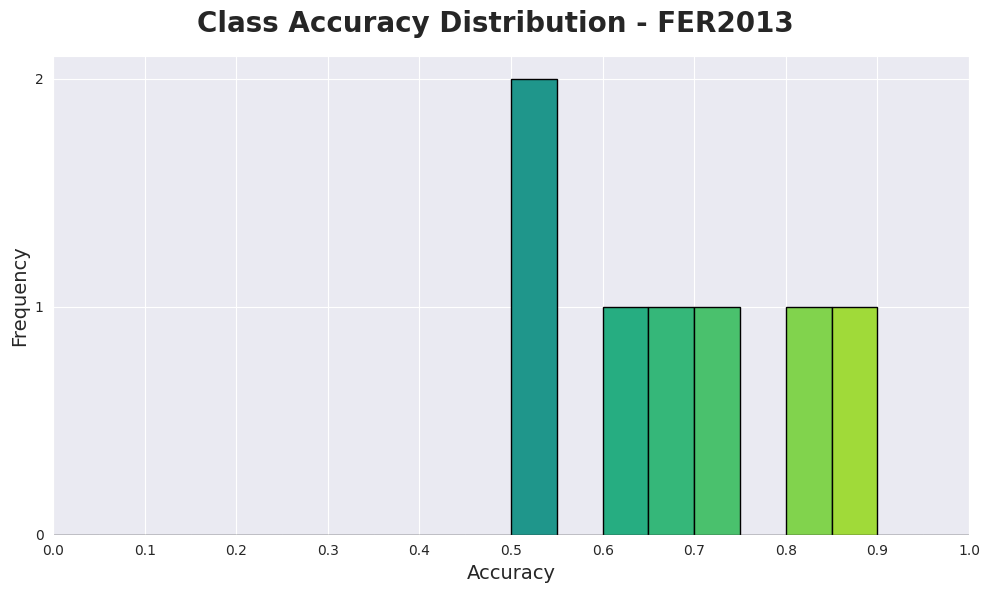

In [96]:
plot_per_class_accuracies(fer2013_per_class_acc, "FER2013", num_bins=20)

#### PCam

In [97]:
vit_pcam = Backbone(
    model_names["ViT"], 
    num_classes=len(pcam_train.get_labels()),
    dropout=True,
    dropout_rate=0.2
)

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [98]:
get_model_params(vit_pcam)

Parameters: 85.80M


In [99]:
pcam_loss, pcam_acc, pcam_per_class_acc, _, _, _ = train_model(
    vit_pcam,
    pcam_train,
    config,
    "vit",
    val=pcam_validation,
    use_val=True,
    fine_tune=True,
    use_early_stopping=config.early_stopping.enabled,
    gradient_clipping=config.gradient_clipping.enabled,
    scheduling=config.scheduler.enabled,
)

100%|██████████| 1024/1024 [01:31<00:00, 11.17it/s]


Epochs: 1/10 | train_loss: 0.1801 | train_acc: 0.9304 | val_loss: 0.2932 | val_acc: 0.9015


100%|██████████| 1024/1024 [01:30<00:00, 11.34it/s]


Epochs: 2/10 | train_loss: 0.1189 | train_acc: 0.9578 | val_loss: 0.4912 | val_acc: 0.8583


100%|██████████| 9421/9421 [38:18<00:00,  4.10it/s]
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:240: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)
100%|██████████| 1024/1024 [01:30<00:00, 11.27it/s]


Epochs: 3/10 | train_loss: 0.0867 | train_acc: 0.9704 | val_loss: 0.5557 | val_acc: 0.8614


100%|██████████| 1024/1024 [01:29<00:00, 11.38it/s]


Early stopping triggered. Stopping training and saving the model...


In [100]:
pcam_loss, pcam_acc, pcam_per_class_acc = evaluate_model(vit_pcam, pcam_test, config)

100%|██████████| 1024/1024 [01:28<00:00, 11.53it/s]

test_loss: 0.3856 | test_acc: 0.8890


In [101]:
pcam_accs.append(pcam_acc)

In [102]:
pcam_per_class_acc

{'healthy lymph node tissue': 0.9787688365566469,
 'lymph node tumor tissue': 0.7991085058313488}

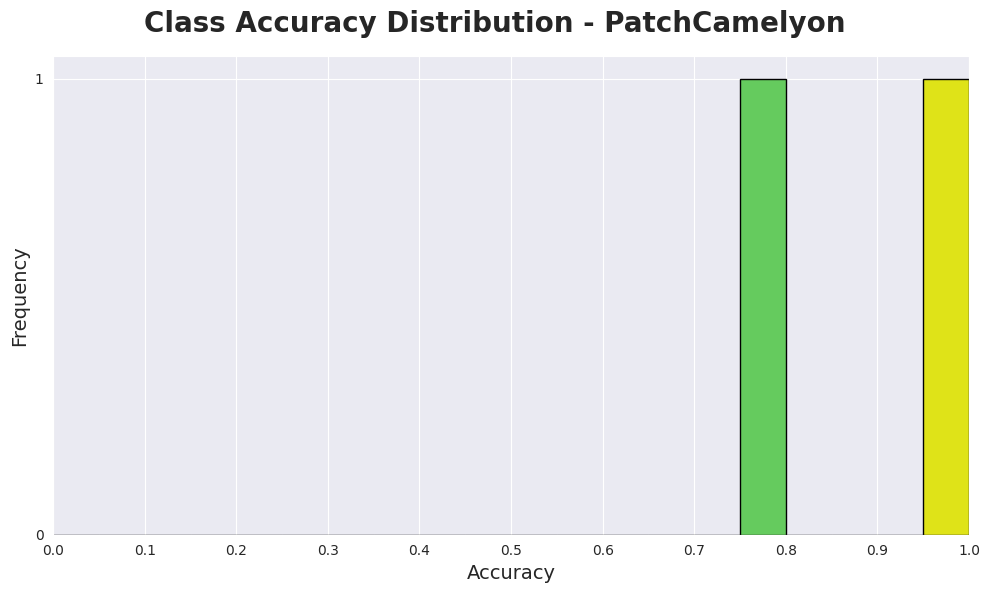

In [103]:
plot_per_class_accuracies(pcam_per_class_acc, "PatchCamelyon", num_bins=20)

#### SUN397

In [104]:
vit_sun397 = Backbone(
    model_names["ViT"], 
    num_classes=len(sun397_train.get_labels()),
    dropout=True,
    dropout_rate=0.2
)

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([397]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([397, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [105]:
get_model_params(vit_sun397)

Parameters: 86.10M


In [106]:
sun397_loss, sun397_acc, sun397_per_class_acc, _, _, _ = train_model(
    vit_sun397,
    sun397_train,
    config,
    "vit",
    val=sun397_validation,
    use_val=True,
    fine_tune=True,
    use_early_stopping=config.early_stopping.enabled,
    gradient_clipping=config.gradient_clipping.enabled,
    scheduling=config.scheduler.enabled,
)

100%|██████████| 340/340 [01:01<00:00,  5.52it/s]


Epochs: 1/10 | train_loss: 5.1337 | train_acc: 0.1558 | val_loss: 4.1440 | val_acc: 0.3382


100%|██████████| 340/340 [00:58<00:00,  5.83it/s]


Epochs: 2/10 | train_loss: 2.6673 | train_acc: 0.5223 | val_loss: 1.5795 | val_acc: 0.6782


100%|██████████| 2736/2736 [14:20<00:00,  3.18it/s]
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:240: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)
100%|██████████| 340/340 [00:58<00:00,  5.85it/s]


Epochs: 3/10 | train_loss: 1.2307 | train_acc: 0.7226 | val_loss: 0.9315 | val_acc: 0.7620


100%|██████████| 340/340 [00:58<00:00,  5.80it/s]


Epochs: 4/10 | train_loss: 0.7028 | train_acc: 0.8178 | val_loss: 0.8322 | val_acc: 0.7739


100%|██████████| 340/340 [00:58<00:00,  5.82it/s]


Epochs: 5/10 | train_loss: 0.3902 | train_acc: 0.8942 | val_loss: 0.8339 | val_acc: 0.7773


100%|██████████| 340/340 [00:58<00:00,  5.85it/s]


Epochs: 6/10 | train_loss: 0.1968 | train_acc: 0.9496 | val_loss: 0.9067 | val_acc: 0.7723


100%|██████████| 340/340 [00:59<00:00,  5.70it/s]


Early stopping triggered. Stopping training and saving the model...


In [107]:
sun397_loss, sun397_acc, sun397_per_class_acc = evaluate_model(
    vit_sun397, sun397_test, config
)

100%|██████████| 680/680 [02:00<00:00,  5.64it/s]


test_loss: 0.9508 | test_acc: 0.7754


In [108]:
sun397_accs.append(sun397_acc)

In [109]:
get_top_5_accuracies(sun397_per_class_acc)

[('batters box', 1.0),
 ('bullring', 1.0),
 ('cockpit', 1.0),
 ('oast house', 1.0),
 ('raceway', 1.0)]

In [110]:
get_bottom_5_accuracies(sun397_per_class_acc)

[('bistro (indoor)', 0.15789473684210525),
 ('recreation room', 0.18518518518518517),
 ('biology laboratory', 0.22727272727272727),
 ('art school', 0.23076923076923078),
 ('gift shop', 0.25)]

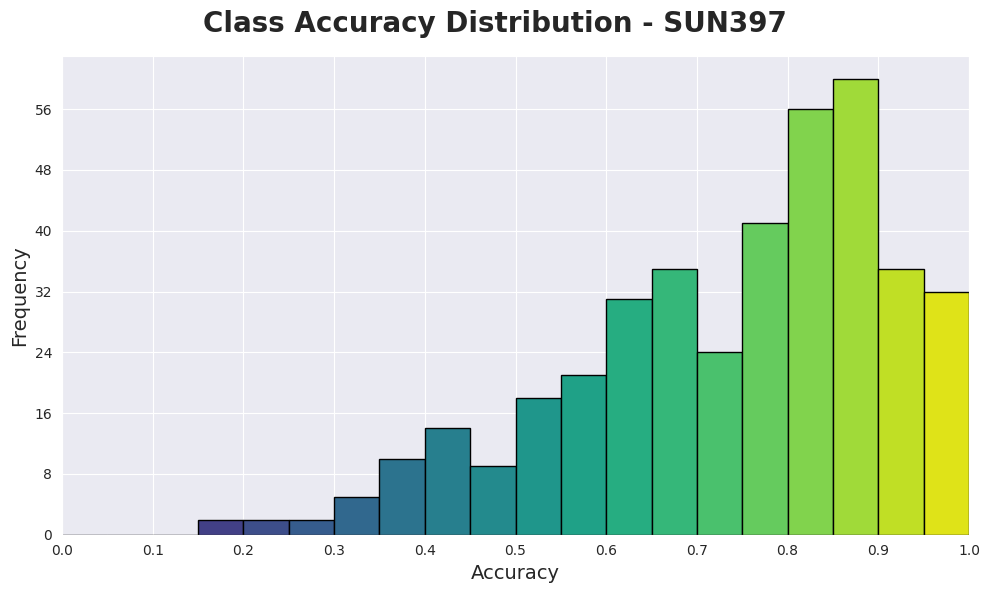

In [111]:
plot_per_class_accuracies(sun397_per_class_acc, "SUN397", num_bins=20)

#### DTD

In [112]:
vit_dtd = Backbone(
    model_names["ViT"], 
    num_classes=len(dtd_train.get_labels()), 
    dropout=True, 
    dropout_rate=0.2
)

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([47]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([47, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [113]:
get_model_params(vit_dtd)

Parameters: 85.83M


In [114]:
dtd_loss, dtd_acc, dtd_per_class_acc, _, _, _ = train_model(
    vit_dtd,
    dtd_train,
    config,
    "vit",
    val=dtd_validation,
    use_val=True,
    fine_tune=True,
    use_early_stopping=config.early_stopping.enabled,
    gradient_clipping=config.gradient_clipping.enabled,
    scheduling=config.scheduler.enabled,
)

100%|██████████| 12/12 [00:01<00:00,  6.77it/s]


Epochs: 1/10 | train_loss: 3.9837 | train_acc: 0.0296 | val_loss: 3.8200 | val_acc: 0.0399


100%|██████████| 12/12 [00:01<00:00,  6.63it/s]


Epochs: 2/10 | train_loss: 3.5122 | train_acc: 0.1462 | val_loss: 3.1258 | val_acc: 0.3404


100%|██████████| 122/122 [00:36<00:00,  3.35it/s]
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:240: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)
100%|██████████| 12/12 [00:01<00:00,  6.67it/s]


Epochs: 3/10 | train_loss: 2.4045 | train_acc: 0.5420 | val_loss: 1.9152 | val_acc: 0.6383


100%|██████████| 12/12 [00:01<00:00,  6.59it/s]


Epochs: 4/10 | train_loss: 1.2202 | train_acc: 0.8062 | val_loss: 1.1495 | val_acc: 0.7500


100%|██████████| 12/12 [00:01<00:00,  6.59it/s]


Epochs: 5/10 | train_loss: 0.5329 | train_acc: 0.9286 | val_loss: 0.9327 | val_acc: 0.7739


100%|██████████| 12/12 [00:01<00:00,  6.68it/s]


Epochs: 6/10 | train_loss: 0.2131 | train_acc: 0.9841 | val_loss: 0.8061 | val_acc: 0.7899


100%|██████████| 12/12 [00:01<00:00,  6.71it/s]


Epochs: 7/10 | train_loss: 0.0824 | train_acc: 0.9987 | val_loss: 0.7795 | val_acc: 0.8138


100%|██████████| 12/12 [00:01<00:00,  6.67it/s]


Epochs: 8/10 | train_loss: 0.0440 | train_acc: 0.9992 | val_loss: 0.7595 | val_acc: 0.8245


100%|██████████| 12/12 [00:01<00:00,  6.67it/s]


Epochs: 9/10 | train_loss: 0.0329 | train_acc: 1.0000 | val_loss: 0.7627 | val_acc: 0.8191


100%|██████████| 12/12 [00:01<00:00,  6.64it/s]

Epochs: 10/10 | train_loss: 0.0296 | train_acc: 1.0000 | val_loss: 0.7614 | val_acc: 0.8191


In [115]:
dtd_loss, dtd_acc, dtd_per_class_acc = evaluate_model(vit_dtd, dtd_test, config)

100%|██████████| 59/59 [00:08<00:00,  6.89it/s]

test_loss: 0.8148 | test_acc: 0.7835


In [116]:
dtd_accs.append(dtd_acc)

In [117]:
get_top_5_accuracies(dtd_per_class_acc)

[('knitted', 1.0),
 ('crystalline', 0.975),
 ('scaly', 0.975),
 ('cobwebbed', 0.95),
 ('frilly', 0.95)]

In [118]:
get_bottom_5_accuracies(dtd_per_class_acc)

[('woven', 0.475),
 ('blotchy', 0.525),
 ('stained', 0.525),
 ('pitted', 0.6),
 ('porous', 0.6)]

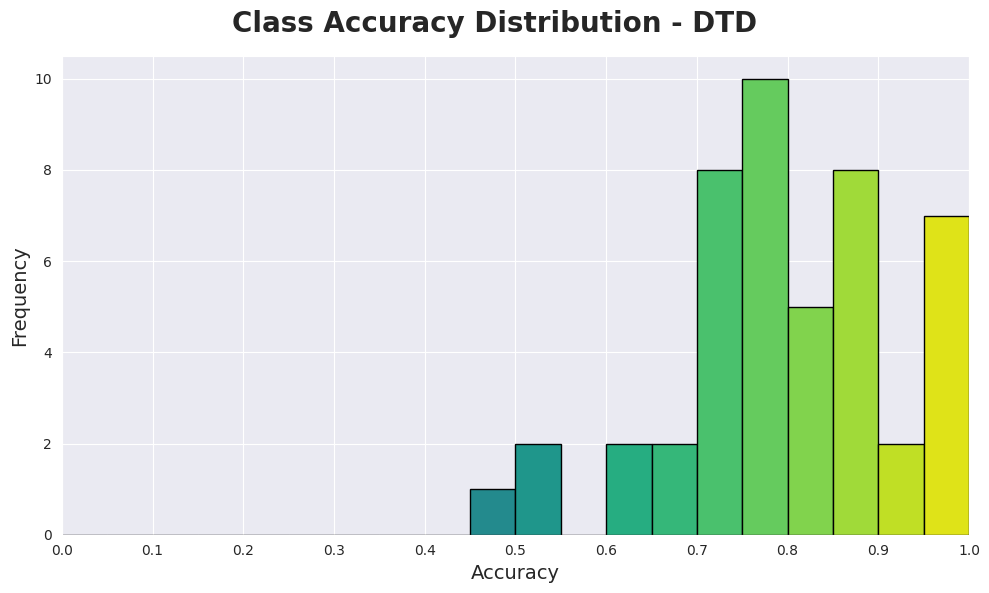

In [119]:
plot_per_class_accuracies(dtd_per_class_acc, "DTD", num_bins=20)

### Results

Display the results of the analysis in dataframe.

In [120]:
results = [
    resisc45_accs,
    food101_accs,
    fer2013_accs,
    pcam_accs,
    sun397_accs,
    dtd_accs,
]

In [121]:
labels = ["RESISC45", "Food-101", "FER2013", "PatchCamelyon", "SUN397", "DTD"]

In [122]:
acc_dict = create_accuracy_dict(results, labels)

In [123]:
df = pd.DataFrame(results, columns=["fine-tuning with data augmentations"], index=labels)
df

,fine-tuning with data augmentations
RESISC45,0.955397
Food-101,0.826759
FER2013,0.708275
PatchCamelyon,0.888977
SUN397,0.775356
DTD,0.783511
